In [2]:
from torch import nn, optim
import torch
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Create data class
from torch.utils.data import Dataset, DataLoader

class data(Dataset):
    
    def __init__(self, train = True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3 * self.x + 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
        #Outlier
        if train == True:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [9]:
# Create training dataset and validation dataset

train_data = data()
val_data = data(train = False)

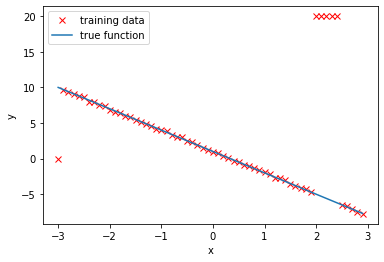

In [10]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label = 'training data')
plt.plot(train_data.x.numpy(), train_data.f.numpy(), label = 'true function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [11]:
#Create a linear regression object, data loader, and criterion function

In [12]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    #Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [13]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

In [14]:
#Different learning rates and data structures to store results for different hyperparameters

In [15]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates = [0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS = []

In [16]:
#Train different models for different hyperparameters

In [21]:
# Define the train model function and train the model

def train_model_with_lr(iter, lr_list):
    #Iterate through different learning rates
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        #train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
        
        #Validation data
        Yhat = model(val_data.y)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)
        
train_model_with_lr(10, learning_rates)

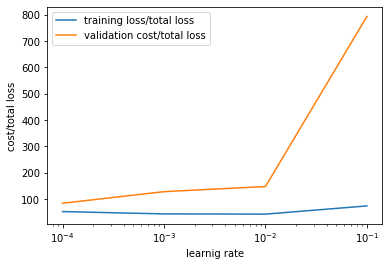

In [22]:
# Plot the training loss and validation loss


plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total loss')
plt.ylabel('cost/total loss')
plt.xlabel('learnig rate')
plt.legend()
plt.show()

i [[2.2476406]
 [2.1746356]
 [2.1016304]]
i [[5.563936 ]
 [5.4459505]
 [5.327964 ]]
i [[6.5950966]
 [6.4609804]
 [6.3268642]]
i [[14.461637 ]
 [14.0272045]
 [13.592772 ]]


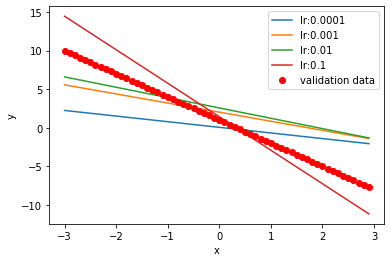

In [27]:
# Plot the predictions

i = 0

for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])

    
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()